<a href="https://colab.research.google.com/github/DB9653/Bachelorarbeit/blob/main/NSIT_IIITDWD_(TrainGE18_TestGE19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/roushan-raj/HASOC-2020/blob/master/Models/German%20Models/German%20Sub-task%20A.ipynb


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'


# Dataset Reading


In [ ]:
import pandas as pd 
#data = pd.read_excel('/content/hasoc_2020_de_train_new_a.xlsx', converters={'tweet_id':int})
data = pd.read_csv("/content/germeval2018training.txt",sep="\t", encoding = "UTF-8", names=("text", "task1", "task2"))
pd.set_option('display.max_colwidth',150)
data.head(10)

,text,task1,task2
0,"@corinnamilborn Liebe Corinna, wir würden dich gerne als Moderatorin für uns gewinnen! Wärst du begeisterbar?",OTHER,OTHER
1,"@Martin28a Sie haben ja auch Recht. Unser Tweet war etwas missverständlich. Dass das BVerfG Sachleistungen nicht ausschließt, kritisieren wir.",OTHER,OTHER
2,@ahrens_theo fröhlicher gruß aus der schönsten stadt der welt theo ⚓️,OTHER,OTHER
3,@dushanwegner Amis hätten alles und jeden gewählt...nur Hillary wollten sie nicht und eine Fortsetzung von Obama-Politik erst recht nicht..!,OTHER,OTHER
4,@spdde kein verläßlicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgesprächen - schickt diese Stümper #SPD in die Versenkung.,OFFENSE,INSULT
5,"@Dirki_M Ja, aber wo widersprechen die Zahlen denn denen, die im von uns verlinkten Artikel stehen? In unserem Tweet geht es rein um subs. Geschüt...",OTHER,OTHER
6,@milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht mir am Arsch vorbei was in dieser Zeit geschehen ist. Ich lebe im heute und jetzt...,OFFENSE,PROFANITY
7,@jayxderxmensch @jayxthexhuman Wieso? Was findest du da unklar?,OTHER,OTHER
8,@tagesschau Euere AfD Hetze wirkt. Da könnt ihr stolz sein bei #ARD-Fernsehen,OFFENSE,ABUSE
9,"Deutsche Medien, Halbwahrheiten und einseitige Betrachtung, wie bei allen vom Staat finanzierten ""billigen"" Propagandainstitutionen 😜",OFFENSE,ABUSE


In [ ]:
data.shape

(5009, 3)

In [ ]:
print(data.dtypes)

text     object
task1    object
task2    object
dtype: object


# Making of "label" Variable


In [ ]:
label = data['task1']
label.head()

0      OTHER
1      OTHER
2      OTHER
3      OTHER
4    OFFENSE
Name: task1, dtype: object

# Checking Dataset Balancing


OTHER      3321
OFFENSE    1688
Name: task1, dtype: int64


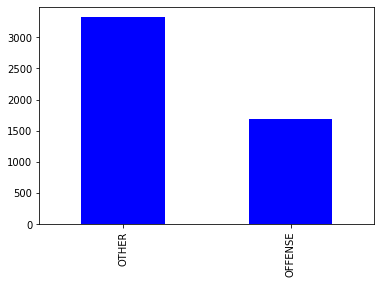

In [ ]:
print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

# Converting label into "0" or "1"


In [ ]:
import numpy as np
classes_list = ["OFFENSE","OTHER"]
label_index = data['task1'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:10])



[1 1 1 1 0 1 0 1 0 0]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=2)

In [ ]:
print(label_twoDimension[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


# Making of "text" Variable


In [ ]:
text = data['text']
text.head(10)



0                                            @corinnamilborn Liebe Corinna, wir würden dich gerne als Moderatorin für uns gewinnen! Wärst du begeisterbar?
1           @Martin28a Sie haben ja auch Recht. Unser Tweet war etwas missverständlich. Dass das BVerfG Sachleistungen nicht ausschließt, kritisieren wir.
2                                                                                    @ahrens_theo fröhlicher gruß aus der schönsten stadt der welt theo ⚓️
3             @dushanwegner Amis hätten alles und jeden gewählt...nur Hillary wollten sie nicht und eine Fortsetzung von Obama-Politik erst recht nicht..!
4                 @spdde kein verläßlicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgesprächen - schickt diese Stümper #SPD in die Versenkung.
5    @Dirki_M Ja, aber wo widersprechen die Zahlen denn denen, die im von uns verlinkten Artikel stehen? In unserem Tweet geht es rein um subs. Geschüt...
6    @milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht 

# Dataset Pre-processing


In [ ]:
def remove_umlaut(string):
    """
    Removes umlauts from strings and replaces them with the letter+e convention
    :param string: string to remove umlauts from
    :return: unumlauted string
    """
    u = 'ü'.encode()
    U = 'Ü'.encode()
    a = 'ä'.encode()
    A = 'Ä'.encode()
    o = 'ö'.encode()
    O = 'Ö'.encode()
    ss = 'ß'.encode()

    string = string.encode()
    string = string.replace(u, b'ue')
    string = string.replace(U, b'Ue')
    string = string.replace(a, b'ae')
    string = string.replace(A, b'Ae')
    string = string.replace(o, b'oe')
    string = string.replace(O, b'Oe')
    string = string.replace(ss, b'ss')

    string = string.decode('utf-8')
    return string

In [ ]:
text_wo_umlauts = text.apply(lambda x:remove_umlaut(x))
text_wo_umlauts.head(10)

0                                         @corinnamilborn Liebe Corinna, wir wuerden dich gerne als Moderatorin fuer uns gewinnen! Waerst du begeisterbar?
1         @Martin28a Sie haben ja auch Recht. Unser Tweet war etwas missverstaendlich. Dass das BVerfG Sachleistungen nicht ausschliesst, kritisieren wir.
2                                                                                 @ahrens_theo froehlicher gruss aus der schoensten stadt der welt theo ⚓️
3           @dushanwegner Amis haetten alles und jeden gewaehlt...nur Hillary wollten sie nicht und eine Fortsetzung von Obama-Politik erst recht nicht..!
4             @spdde kein verlaesslicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgespraechen - schickt diese Stuemper #SPD in die Versenkung.
5    @Dirki_M Ja, aber wo widersprechen die Zahlen denn denen, die im von uns verlinkten Artikel stehen? In unserem Tweet geht es rein um subs. Geschue...
6    @milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht 

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text = text_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0                                          corinnamilborn liebe corinna, wir wuerden dich gerne als moderatorin fuer uns gewinnen! waerst du begeisterbar 
1           ma in28a sie haben ja auch recht. unser tweet war etwas missverstaendlich. dass das bverfg sachleistungen nicht ausschliesst, kritisieren wir.
2                                                                                  ahrens theo froehlicher gruss aus der schoensten stadt der welt theo   
3             dushanwegner amis haetten alles und jeden gewaehlt...nur hillary wollten sie nicht und eine fo setzung von obama-politik erst recht nicht..!
4                spdde kein verlaesslicher verhandlungspa ner. nachka eln nach den sondierzngsgespraechen - schickt diese stuemper  spd in die versenkung.
5     dirki m ja, aber wo widersprechen die zahlen denn denen, die im von uns verlinkten a ikel stehen  in unserem tweet geht es rein um subs. geschuet...
6     milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht 

# Removing stopwords


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0                                                              corinnamilborn liebe corinna, wuerden gerne moderatorin fuer gewinnen! waerst begeisterbar 
1                                                         ma in28a ja recht. tweet missverstaendlich. bverfg sachleistungen ausschliesst, kritisieren wir.
2                                                                                              ahrens theo froehlicher gruss schoensten stadt welt theo   
3                                                    dushanwegner amis haetten gewaehlt...nur hillary wollten fo setzung obama-politik erst recht nicht..!
4                                           spdde verlaesslicher verhandlungspa ner. nachka eln sondierzngsgespraechen - schickt stuemper  spd versenkung.
5     dirki m ja, widersprechen zahlen denen, verlinkten a ikel stehen  tweet geht rein subs. geschuetzte. 2017 gesamte familiennachzug vergleich 2016 ...
6                                                              milenah

# Lemmatization

# Stemming

In [ ]:


# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text



In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head())

0                        corinnamilborn liebe corinna, wuerden gerne moderatorin fuer gewinnen! waerst begeisterbar 
1                   ma in28a ja recht. tweet missverstaendlich. bverfg sachleistungen ausschliesst, kritisieren wir.
2                                                        ahrens theo froehlicher gruss schoensten stadt welt theo   
3              dushanwegner amis haetten gewaehlt...nur hillary wollten fo setzung obama-politik erst recht nicht..!
4     spdde verlaesslicher verhandlungspa ner. nachka eln sondierzngsgespraechen - schickt stuemper  spd versenkung.
Name: text, dtype: object


# Tokenization using "keras"


In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)

# Making Vocab for words


In [ ]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

17327


In [ ]:


l = tok_all.word_index
print(l)



{'lbr': 1, 'fuer': 2, 'merkel': 3, 'schon': 4, 'deutschland': 5, 'afd': 6, 'mehr': 7, 'mal': 8, 'ja': 9, 'ueber': 10, 'u': 11, 'immer': 12, 'heute': 13, 'gibt': 14, 'welt': 15, 'wer': 16, 'd': 17, 'nicht': 18, 'ist': 19, 'deutschen': 20, 'e': 21, 'deutsche': 22, 'land': 23, 'geht': 24, 'spd': 25, 'werden': 26, 'krippmarie': 27, 'en': 28, 'info2099': 29, 'amp': 30, 'petpanther0': 31, 'noherrman': 32, 'franz': 33, 'muessen': 34, 'md': 35, 'ellibisathide': 36, 'wuerde': 37, 'pa': 38, 'athinamala': 39, 'macmike': 40, 'a': 41, 'menschen': 42, 'thomasgbauer': 43, 'feldenfrizz': 44, 'gut': 45, 'macht': 46, 'charlie': 47, 'silve': 48, 'nasanasal': 49, 's': 50, 'koennen': 51, 'machtjanix23': 52, 'einfach': 53, 'lifetrend': 54, 'gruenen': 55, 'eu': 56, 'schmiddiemaik': 57, 'willjrosenblatt': 58, 'waere': 59, 'wurde': 60, 'seit': 61, 'politiker': 62, 'die': 63, 'putin': 64, 'cdu': 65, 'haben': 66, 'geld': 67, 'wohl': 68, 'warum': 69, 'gerade': 70, 'politik': 71, '2': 72, 'und': 73, 'troll': 74, '

# encoding or sequencing


In [ ]:
encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[0])
print(encoded_clean_text_stem[0])

 corinnamilborn liebe corinna, wuerden gerne moderatorin fuer gewinnen! waerst begeisterbar 
[4221, 191, 6796, 258, 233, 6797, 2, 2418, 2419, 6798]


# Pre-padding


In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')

# Reading Test data and Pre-processing


In [ ]:
data_t = pd.read_csv("/content/germeval2019GoldLabelsSubtask1_2.txt", sep="\t", encoding = "UTF-8", names=("text", "task1", "task2"))
pd.set_option('display.max_colwidth',150)
data_t.head(10)



,text,task1,task2
0,@JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...,OFFENSE,INSULT
1,"@faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schäuble, vdLeyen für Korruption, Schwarzgeld, und dies überall...",OFFENSE,ABUSE
2,"@DLFNachrichten Die Gesichter, Namen, Religion der Täter würde zur Aufklärung beitragen...",OTHER,OTHER
3,"@welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man da...",OFFENSE,ABUSE
4,"@hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst für ihr kacken arbeiten...",OFFENSE,ABUSE
5,"@aktuelle_stunde Also beim Fall Birmingham, England war definitiv weniger Empörung, weniger Berichterstattung, wenn man ehrlich mit sich ist gab e...",OTHER,OTHER
6,"@StZ_NEWS Aber bei läppischen 130.000 Euro der AfD den Welt, Demokratieuntergang herbei schreiben....wie süß",OTHER,OTHER
7,@StZ_NEWS Schäuble wird wissen woher dieses Nazi Geld kommt....FJS hatte doch auch glasige Augen vor Freude wenn vom Führer die Rede war..,OFFENSE,ABUSE
8,"@welt Komisch, wäre dieser Betrug in der Nähe der AfD passiert wäre eine andere Empörung erkennbar, so aber da es Ferkel und Co trifft werden Baue...",OFFENSE,ABUSE
9,"@investigativ_de @welt @Tim_Roehn @ChSchweppe Und alle Wege führen zu von der Leyen, was dann verwundert das die immer noch im Amt ist, wobei, im ...",OFFENSE,ABUSE


In [ ]:
data_t.shape

(3031, 3)

In [ ]:
print(data_t.dtypes)

text     object
task1    object
task2    object
dtype: object


In [ ]:


label_t = data_t['task1']
label_t.head()



0    OFFENSE
1    OFFENSE
2      OTHER
3    OFFENSE
4    OFFENSE
Name: task1, dtype: object

OTHER      2061
OFFENSE     970
Name: task1, dtype: int64


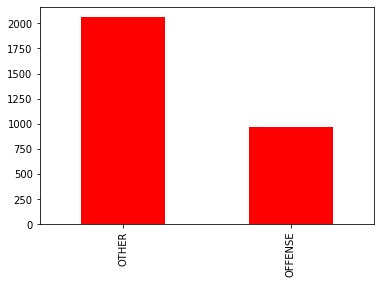

In [ ]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

In [ ]:


import numpy as np
classes_list_t = ["OFFENSE","OTHER"]
label_t_index = data_t['task1'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])



[0 0 1 0 0 1 1 0 0 0]


In [ ]:


from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=2)



In [ ]:
print(label_twoDimension_t[:10])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:


text_t = data_t['text']
text_t.head(10)



0                                      @JanZimmHHB @mopo Komisch das die Realitätsverweigerung immer von linken erbärmlichen Correctiv Accounts ausgeht...
1                  @faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schäuble, vdLeyen für Korruption, Schwarzgeld, und dies überall...
2                                                               @DLFNachrichten Die Gesichter, Namen, Religion der Täter würde zur Aufklärung beitragen...
3    @welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man da...
4    @hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst für ihr kacken arbeiten...
5    @aktuelle_stunde Also beim Fall Birmingham, England war definitiv weniger Empörung, weniger Berichterstattung, wenn man ehrlich mit sich ist gab e...
6                                             @StZ_NEWS Aber bei läppi

In [ ]:
test_wo_umlauts = text_t.apply(lambda x: remove_umlaut(x))

In [ ]:
test_wo_umlauts.head()

0                                    @JanZimmHHB @mopo Komisch das die Realitaetsverweigerung immer von linken erbaermlichen Correctiv Accounts ausgeht...
1               @faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Schaeuble, vdLeyen fuer Korruption, Schwarzgeld, und dies ueberall...
2                                                            @DLFNachrichten Die Gesichter, Namen, Religion der Taeter wuerde zur Aufklaerung beitragen...
3    @welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man da...
4    @hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst fuer ihr kacken arbeite...
Name: text, dtype: object

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text_t = test_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0                                     janzimmhhb  mopo komisch das die realitaetsverweigerung immer von linken erbaermlichen correctiv accounts ausgeht...
1                faznet  gruene europa  spdeuropa  cdu cdu steht seid strauss, kohl, schaeuble, vdleyen fuer korruption, schwarzgeld, und dies ueberall...
2                                                             dlfnachrichten die gesichter, namen, religion der taeter wuerde zur aufklaerung beitragen...
3     welt wie verwir  muss man sein um sich zu weigern die tatsachen anzuerkennen, das dieser hass von ferkel impo ie  wurde....was bezweckt man damit...
4     hacker 1991  torben braga weil die afd den ferkelfunk abschaffen will, deshalb haben die linken zecken, schmarotzer angst fuer ihr kacken arbeite...
5     aktuelle stunde also beim fall birmingham, england war definitiv weniger empoerung, weniger berichterstattung, wenn man ehrlich mit sich ist gab ...
6                                           stz news aber bei laeppisc

In [ ]:


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0                                                 janzimmhhb  mopo komisch realitaetsverweigerung immer linken erbaermlichen correctiv accounts ausgeht...
1                         faznet  gruene europa  spdeuropa  cdu cdu steht seid strauss, kohl, schaeuble, vdleyen fuer korruption, schwarzgeld, ueberall...
2                                                                         dlfnachrichten gesichter, namen, religion taeter wuerde aufklaerung beitragen...
3                                 welt verwir  weigern tatsachen anzuerkennen, hass ferkel impo ie  wurde....was bezweckt selber beluegen, unverstaendlich
4     hacker 1991  torben braga afd ferkelfunk abschaffen will, deshalb linken zecken, schmarotzer angst fuer kacken arbeiten muessen, deshalb fuehrer ...
5     aktuelle stunde beim fall birmingham, england definitiv weniger empoerung, weniger berichterstattung, ehrlich gab gar oerr, hintergrundwissen, re...
6                                                            stz news 

# Stemming

In [ ]:
# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0                                                 janzimmhhb  mopo komisch realitaetsverweigerung immer linken erbaermlichen correctiv accounts ausgeht...
1                         faznet  gruene europa  spdeuropa  cdu cdu steht seid strauss, kohl, schaeuble, vdleyen fuer korruption, schwarzgeld, ueberall...
2                                                                         dlfnachrichten gesichter, namen, religion taeter wuerde aufklaerung beitragen...
3                                 welt verwir  weigern tatsachen anzuerkennen, hass ferkel impo ie  wurde....was bezweckt selber beluegen, unverstaendlich
4     hacker 1991  torben braga afd ferkelfunk abschaffen will, deshalb linken zecken, schmarotzer angst fuer kacken arbeiten muessen, deshalb fuehrer ...
5     aktuelle stunde beim fall birmingham, england definitiv weniger empoerung, weniger berichterstattung, ehrlich gab gar oerr, hintergrundwissen, re...
6                                                            stz news 

In [ ]:


import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)



In [ ]:


vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)



14335


In [ ]:
test_list = tok_test.word_index
print(test_list)

{'u': 1, 'lbr': 2, 'fuer': 3, 'ja': 4, 'mehr': 5, 'spd': 6, 'mal': 7, 'e': 8, 'schon': 9, 'immer': 10, 'ist': 11, 'fcsp': 12, 'de': 13, 'ueber': 14, 'gibt': 15, 'ha': 16, 'heute': 17, 'watch': 18, 'mena': 19, 'jungnaiv': 20, 'tilojung': 21, 'sdgmasterglass': 22, 'ilona': 23, 'gr': 24, 'czsystuvx': 25, 'netzengel': 26, 'palactnet': 27, 'cdu': 28, 'deutschland': 29, 'vonbeutelratte': 30, 'wer': 31, 'nicht': 32, 'z': 33, 'einfach': 34, '0001f3fb': 35, 'menschen': 36, 'koennen': 37, 'geht': 38, 'iv': 39, 's': 40, '0001f923': 41, 'warum': 42, 'en': 43, 'ba': 44, '0001f602': 45, 'wuerde': 46, 'albe': 47, 'enst1': 48, '2': 49, 'bschuller': 50, 'berlinpapers': 51, 'merkel': 52, 'a': 53, 'waere': 54, '0001f914': 55, 'welt': 56, 'kommt': 57, '0001f44d': 58, 'macht': 59, 'afd': 60, 'gut': 61, 've': 62, 'werden': 63, 'wird': 64, 'toll': 65, 'leben': 66, 'muessen': 67, 'ganz': 68, 'gruenen': 69, 'hat': 70, 'pa': 71, 'genau': 72, 'sein': 73, 'deutsche': 74, '0001f621': 75, 'haben': 76, 'deutschen': 

In [ ]:


encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])



 janzimmhhb  mopo komisch realitaetsverweigerung immer linken erbaermlichen correctiv accounts ausgeht...
[9232, 12, 197, 16722]


In [ ]:


from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')



# FastText Embeddings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gunzip /content/drive/MyDrive/cc.de.300.vec.gz

gzip: /content/drive/MyDrive/cc.de.300.vec.gz: No such file or directory


In [ ]:
# https://stackoverflow.com/questions/69964788/how-to-unzip-gz-file-using-google-colab

# FastText Embedding link - https://fasttext.cc/docs/en/crawl-vectors.html

import os
embeddings_index = {}
f = open('/content/drive/MyDrive/cc.de.300.vec',encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 2000000 word vectors.


In [ ]:


embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector



# CNN 1 Model


In [ ]:


from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq



In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length)

In [ ]:
CNN1_network=Sequential([Embedding_Layer,
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(2,activation="sigmoid")
                       ])



In [ ]:
CNN1_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          5198400   
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          115328    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                        

In [ ]:
# https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers
from tensorflow.keras.optimizers import Adam
CNN1_network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN1_network, to_file='CNN2_model_Train_GERMEVAL2018_Test_GERMEVAL2019_TASK_A.png', show_shapes=True, show_layer_names=True)

from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



In [ ]:


from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



# Model Fitting or Training


In [ ]:
hist = CNN1_network.fit(padded_clean_text_stem,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
157/157 [==============================] - ETA: 0s - loss: 0.6639 - accuracy: 0.6486

157/157 [==============================] - 14s 8ms/step - loss: 0.6639 - accuracy: 0.6486 - lr: 3.0000e-05
Epoch 2/200
157/157 [==============================] - ETA: 0s - loss: 0.6407 - accuracy: 0.6630

157/157 [==============================] - 1s 7ms/step - loss: 0.6407 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 3/200
155/157 [============================>.] - ETA: 0s - loss: 0.6354 - accuracy: 0.6625

157/157 [==============================] - 1s 7ms/step - loss: 0.6350 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 4/200
155/157 [============================>.] - ETA: 0s - loss: 0.6331 - accuracy: 0.6621

157/157 [==============================] - 1s 7ms/step - loss: 0.6325 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 5/200
152/157 [============================>.] - ETA: 0s - loss: 0.6258 - accuracy: 0.6620

157/157 [==============================] - 1s 7ms/step - loss: 0.6248 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 6/200
155/157 [============================>.] - ETA: 0s - loss: 0.6150 - accuracy: 0.6631

157/157 [==============================] - 1s 7ms/step - loss: 0.6149 - accuracy: 0.6632 - lr: 3.0000e-05
Epoch 7/200
157/157 [==============================] - ETA: 0s - loss: 0.6005 - accuracy: 0.6642

157/157 [==============================] - 1s 7ms/step - loss: 0.6005 - accuracy: 0.6642 - lr: 3.0000e-05
Epoch 8/200
156/157 [============================>.] - ETA: 0s - loss: 0.5789 - accuracy: 0.6731

157/157 [==============================] - 1s 7ms/step - loss: 0.5788 - accuracy: 0.6734 - lr: 3.0000e-05
Epoch 9/200
156/157 [============================>.] - ETA: 0s - loss: 0.5458 - accuracy: 0.7151

157/157 [==============================] - 1s 7ms/step - loss: 0.5459 - accuracy: 0.7151 - lr: 3.0000e-05
Epoch 10/200
156/157 [============================>.] - ETA: 0s - loss: 0.5017 - accuracy: 0.7586

157/157 [==============================] - 1s 7ms/step - loss: 0.5016 - accuracy: 0.7588 - lr: 3.0000e-05
Epoch 11/200
153/157 [============================>.] - ETA: 0s - loss: 0.4426 - accuracy: 0.8129

157/157 [==============================] - 1s 7ms/step - loss: 0.4436 - accuracy: 0.8123 - lr: 3.0000e-05
Epoch 12/200
150/157 [===========================>..] - ETA: 0s - loss: 0.3817 - accuracy: 0.8633

157/157 [==============================] - 1s 7ms/step - loss: 0.3811 - accuracy: 0.8648 - lr: 3.0000e-05
Epoch 13/200
151/157 [===========================>..] - ETA: 0s - loss: 0.3194 - accuracy: 0.8994

157/157 [==============================] - 1s 7ms/step - loss: 0.3191 - accuracy: 0.9006 - lr: 3.0000e-05
Epoch 14/200
156/157 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.9215

157/157 [==============================] - 1s 7ms/step - loss: 0.2638 - accuracy: 0.9217 - lr: 3.0000e-05
Epoch 15/200
151/157 [===========================>..] - ETA: 0s - loss: 0.2180 - accuracy: 0.9398

157/157 [==============================] - 1s 7ms/step - loss: 0.2187 - accuracy: 0.9389 - lr: 3.0000e-05
Epoch 16/200
155/157 [============================>.] - ETA: 0s - loss: 0.1831 - accuracy: 0.9490

157/157 [==============================] - 1s 7ms/step - loss: 0.1828 - accuracy: 0.9491 - lr: 3.0000e-05
Epoch 17/200
150/157 [===========================>..] - ETA: 0s - loss: 0.1490 - accuracy: 0.9610

157/157 [==============================] - 1s 7ms/step - loss: 0.1491 - accuracy: 0.9609 - lr: 3.0000e-05
Epoch 18/200
151/157 [===========================>..] - ETA: 0s - loss: 0.1233 - accuracy: 0.9708

157/157 [==============================] - 1s 7ms/step - loss: 0.1233 - accuracy: 0.9707 - lr: 3.0000e-05
Epoch 19/200
152/157 [============================>.] - ETA: 0s - loss: 0.1031 - accuracy: 0.9803

157/157 [==============================] - 1s 7ms/step - loss: 0.1030 - accuracy: 0.9802 - lr: 3.0000e-05
Epoch 20/200
153/157 [============================>.] - ETA: 0s - loss: 0.0853 - accuracy: 0.9849

157/157 [==============================] - 1s 7ms/step - loss: 0.0853 - accuracy: 0.9846 - lr: 3.0000e-05
Epoch 21/200
154/157 [============================>.] - ETA: 0s - loss: 0.0692 - accuracy: 0.9866

157/157 [==============================] - 1s 7ms/step - loss: 0.0695 - accuracy: 0.9862 - lr: 3.0000e-05
Epoch 22/200
153/157 [============================>.] - ETA: 0s - loss: 0.0591 - accuracy: 0.9916

157/157 [==============================] - 1s 7ms/step - loss: 0.0589 - accuracy: 0.9918 - lr: 3.0000e-05
Epoch 23/200
154/157 [============================>.] - ETA: 0s - loss: 0.0489 - accuracy: 0.9939

157/157 [==============================] - 1s 7ms/step - loss: 0.0489 - accuracy: 0.9938 - lr: 3.0000e-05
Epoch 24/200
151/157 [===========================>..] - ETA: 0s - loss: 0.0411 - accuracy: 0.9948

157/157 [==============================] - 1s 7ms/step - loss: 0.0406 - accuracy: 0.9950 - lr: 3.0000e-05
Epoch 25/200
150/157 [===========================>..] - ETA: 0s - loss: 0.0353 - accuracy: 0.9958

157/157 [==============================] - 1s 7ms/step - loss: 0.0351 - accuracy: 0.9960 - lr: 3.0000e-05
Epoch 26/200
151/157 [===========================>..] - ETA: 0s - loss: 0.0291 - accuracy: 0.9973

157/157 [==============================] - 1s 7ms/step - loss: 0.0289 - accuracy: 0.9974 - lr: 3.0000e-05
Epoch 27/200
151/157 [===========================>..] - ETA: 0s - loss: 0.0250 - accuracy: 0.9981

157/157 [==============================] - 1s 7ms/step - loss: 0.0250 - accuracy: 0.9982 - lr: 3.0000e-05
Epoch 28/200
150/157 [===========================>..] - ETA: 0s - loss: 0.0209 - accuracy: 0.9992

157/157 [==============================] - 1s 7ms/step - loss: 0.0211 - accuracy: 0.9990 - lr: 3.0000e-05
Epoch 29/200
153/157 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9996

157/157 [==============================] - 1s 7ms/step - loss: 0.0180 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 30/200
153/157 [============================>.] - ETA: 0s - loss: 0.0153 - accuracy: 0.9990

157/157 [==============================] - 1s 7ms/step - loss: 0.0154 - accuracy: 0.9990 - lr: 3.0000e-05
Epoch 31/200
151/157 [===========================>..] - ETA: 0s - loss: 0.0134 - accuracy: 0.9998

157/157 [==============================] - 1s 7ms/step - loss: 0.0133 - accuracy: 0.9998 - lr: 3.0000e-05
Epoch 32/200
154/157 [============================>.] - ETA: 0s - loss: 0.0114 - accuracy: 0.9994

157/157 [==============================] - 1s 7ms/step - loss: 0.0115 - accuracy: 0.9994 - lr: 3.0000e-05
Epoch 33/200
150/157 [===========================>..] - ETA: 0s - loss: 0.0104 - accuracy: 0.9998

157/157 [==============================] - 1s 7ms/step - loss: 0.0104 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 34/200
153/157 [============================>.] - ETA: 0s - loss: 0.0092 - accuracy: 0.9994

157/157 [==============================] - 1s 7ms/step - loss: 0.0091 - accuracy: 0.9994 - lr: 3.0000e-05
Epoch 35/200
157/157 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9998

157/157 [==============================] - 1s 7ms/step - loss: 0.0077 - accuracy: 0.9998 - lr: 3.0000e-05
Epoch 36/200
155/157 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9998

157/157 [==============================] - 1s 7ms/step - loss: 0.0066 - accuracy: 0.9998 - lr: 3.0000e-05
Epoch 37/200
155/157 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0054 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 38/200
153/157 [============================>.] - ETA: 0s - loss: 0.0051 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0050 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 39/200
154/157 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0043 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 40/200
151/157 [===========================>..] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0037 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 41/200
156/157 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 42/200
151/157 [===========================>..] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0030 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 43/200
151/157 [===========================>..] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0027 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 44/200
157/157 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0025 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 45/200
153/157 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0023 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 46/200
154/157 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0019 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 47/200
152/157 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 48/200
155/157 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 49/200
151/157 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0015 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 50/200
150/157 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 51/200
152/157 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998

157/157 [==============================] - 1s 7ms/step - loss: 0.0014 - accuracy: 0.9998 - lr: 3.0000e-05
Epoch 52/200
152/157 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 53/200
157/157 [==============================] - ETA: 0s - loss: 8.6954e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.6954e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 54/200
154/157 [============================>.] - ETA: 0s - loss: 8.2314e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.3015e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 55/200
156/157 [============================>.] - ETA: 0s - loss: 7.3306e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.3103e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 56/200
151/157 [===========================>..] - ETA: 0s - loss: 6.6122e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.7599e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 57/200
155/157 [============================>.] - ETA: 0s - loss: 6.3017e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.2915e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 58/200
157/157 [==============================] - ETA: 0s - loss: 5.6470e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 5.6470e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 59/200
153/157 [============================>.] - ETA: 0s - loss: 4.8290e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.7739e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 60/200
155/157 [============================>.] - ETA: 0s - loss: 4.3695e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.3748e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 61/200
157/157 [==============================] - ETA: 0s - loss: 5.7114e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.7114e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 62/200
151/157 [===========================>..] - ETA: 0s - loss: 3.4174e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.4788e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 63/200
156/157 [============================>.] - ETA: 0s - loss: 3.4934e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.4843e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 64/200
152/157 [============================>.] - ETA: 0s - loss: 3.7417e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.7328e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 65/200
153/157 [============================>.] - ETA: 0s - loss: 2.7602e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.7618e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 66/200
157/157 [==============================] - ETA: 0s - loss: 2.9597e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.9597e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 67/200
154/157 [============================>.] - ETA: 0s - loss: 2.4221e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.4061e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 68/200
154/157 [============================>.] - ETA: 0s - loss: 2.2380e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.2434e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 69/200
155/157 [============================>.] - ETA: 0s - loss: 1.9154e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.9066e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 70/200
157/157 [==============================] - ETA: 0s - loss: 2.0698e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.0698e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 71/200
155/157 [============================>.] - ETA: 0s - loss: 1.7494e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.7552e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 72/200
150/157 [===========================>..] - ETA: 0s - loss: 1.6394e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.6174e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 73/200
157/157 [==============================] - ETA: 0s - loss: 1.5338e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.5338e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 74/200
151/157 [===========================>..] - ETA: 0s - loss: 1.3512e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.3640e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 75/200
155/157 [============================>.] - ETA: 0s - loss: 1.1938e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.1858e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 76/200
157/157 [==============================] - ETA: 0s - loss: 1.1335e-04 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.1335e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 77/200
155/157 [============================>.] - ETA: 0s - loss: 9.9161e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 9.8955e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 78/200
152/157 [============================>.] - ETA: 0s - loss: 8.2848e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.2270e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 79/200
151/157 [===========================>..] - ETA: 0s - loss: 8.3383e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.2237e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 80/200
151/157 [===========================>..] - ETA: 0s - loss: 7.9208e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.9590e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 81/200
154/157 [============================>.] - ETA: 0s - loss: 8.4339e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.3512e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 82/200
151/157 [===========================>..] - ETA: 0s - loss: 7.2083e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.0681e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 83/200
152/157 [============================>.] - ETA: 0s - loss: 7.4985e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.4837e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 84/200
157/157 [==============================] - ETA: 0s - loss: 4.5971e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.5971e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 85/200
154/157 [============================>.] - ETA: 0s - loss: 6.2884e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.3012e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 86/200
151/157 [===========================>..] - ETA: 0s - loss: 3.7589e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.7325e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 87/200
150/157 [===========================>..] - ETA: 0s - loss: 4.8425e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.8207e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 88/200
157/157 [==============================] - ETA: 0s - loss: 3.7226e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.7226e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 89/200
156/157 [============================>.] - ETA: 0s - loss: 3.1409e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.1389e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 90/200
153/157 [============================>.] - ETA: 0s - loss: 2.9774e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.9872e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 91/200
156/157 [============================>.] - ETA: 0s - loss: 3.1296e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.1376e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 92/200
154/157 [============================>.] - ETA: 0s - loss: 2.9126e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.9107e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 93/200
154/157 [============================>.] - ETA: 0s - loss: 2.4394e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.4202e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 94/200
155/157 [============================>.] - ETA: 0s - loss: 4.0011e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.9712e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 95/200
157/157 [==============================] - ETA: 0s - loss: 2.4679e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 9ms/step - loss: 2.4679e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 96/200
154/157 [============================>.] - ETA: 0s - loss: 2.6895e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 9ms/step - loss: 2.6558e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 97/200
154/157 [============================>.] - ETA: 0s - loss: 1.6650e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 9ms/step - loss: 1.6753e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 98/200
151/157 [===========================>..] - ETA: 0s - loss: 2.1323e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 2.1554e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 99/200
152/157 [============================>.] - ETA: 0s - loss: 2.2301e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.2379e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 100/200
154/157 [============================>.] - ETA: 0s - loss: 1.4604e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.4595e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 101/200
155/157 [============================>.] - ETA: 0s - loss: 1.2283e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.2229e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 102/200
155/157 [============================>.] - ETA: 0s - loss: 1.8204e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.8065e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 103/200
153/157 [============================>.] - ETA: 0s - loss: 1.2888e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.2641e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 104/200
156/157 [============================>.] - ETA: 0s - loss: 1.1351e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.1316e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 105/200
153/157 [============================>.] - ETA: 0s - loss: 9.5538e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 9.4601e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 106/200
153/157 [============================>.] - ETA: 0s - loss: 8.2602e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.1278e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 107/200
155/157 [============================>.] - ETA: 0s - loss: 7.9984e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.9802e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 108/200
150/157 [===========================>..] - ETA: 0s - loss: 7.6395e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.6880e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 109/200
150/157 [===========================>..] - ETA: 0s - loss: 1.0425e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.0130e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 110/200
156/157 [============================>.] - ETA: 0s - loss: 9.3199e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 9.3206e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 111/200
155/157 [============================>.] - ETA: 0s - loss: 8.3228e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.2706e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 112/200
153/157 [============================>.] - ETA: 0s - loss: 7.4565e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.4503e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 113/200
157/157 [==============================] - ETA: 0s - loss: 5.1656e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.1656e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 114/200
151/157 [===========================>..] - ETA: 0s - loss: 7.2746e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 7.1601e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 115/200
151/157 [===========================>..] - ETA: 0s - loss: 2.3584e-05 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.3297e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 116/200
153/157 [============================>.] - ETA: 0s - loss: 6.5863e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.6200e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 117/200
154/157 [============================>.] - ETA: 0s - loss: 4.9095e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.8935e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 118/200
153/157 [============================>.] - ETA: 0s - loss: 6.1798e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.1616e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 119/200
151/157 [===========================>..] - ETA: 0s - loss: 3.9602e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.8804e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 120/200
151/157 [===========================>..] - ETA: 0s - loss: 3.7083e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.6168e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 121/200
150/157 [===========================>..] - ETA: 0s - loss: 3.5527e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.4780e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 122/200
151/157 [===========================>..] - ETA: 0s - loss: 2.1621e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.1356e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 123/200
157/157 [==============================] - ETA: 0s - loss: 3.4307e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.4307e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 124/200
157/157 [==============================] - ETA: 0s - loss: 4.3571e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.3571e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 125/200
155/157 [============================>.] - ETA: 0s - loss: 2.1528e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.1843e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 126/200
155/157 [============================>.] - ETA: 0s - loss: 1.8803e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.8791e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 127/200
152/157 [============================>.] - ETA: 0s - loss: 2.2729e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.2301e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 128/200
154/157 [============================>.] - ETA: 0s - loss: 2.6749e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.6567e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 129/200
152/157 [============================>.] - ETA: 0s - loss: 1.3907e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.3746e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 130/200
153/157 [============================>.] - ETA: 0s - loss: 1.7346e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.8024e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 131/200
154/157 [============================>.] - ETA: 0s - loss: 2.4730e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.4487e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 132/200
155/157 [============================>.] - ETA: 0s - loss: 1.5895e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.5780e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 133/200
155/157 [============================>.] - ETA: 0s - loss: 2.9592e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.9750e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 134/200
156/157 [============================>.] - ETA: 0s - loss: 1.2626e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.2613e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 135/200
154/157 [============================>.] - ETA: 0s - loss: 8.8536e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.8604e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 136/200
155/157 [============================>.] - ETA: 0s - loss: 1.1042e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.0966e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 137/200
153/157 [============================>.] - ETA: 0s - loss: 2.2234e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.1839e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 138/200
153/157 [============================>.] - ETA: 0s - loss: 1.0976e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.0774e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 139/200
155/157 [============================>.] - ETA: 0s - loss: 1.1355e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.1885e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 140/200
157/157 [==============================] - ETA: 0s - loss: 1.4033e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.4033e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 141/200
153/157 [============================>.] - ETA: 0s - loss: 1.4037e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.3754e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 142/200
150/157 [===========================>..] - ETA: 0s - loss: 1.6377e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.5832e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 143/200
154/157 [============================>.] - ETA: 0s - loss: 1.3578e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.3440e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 144/200
157/157 [==============================] - ETA: 0s - loss: 7.7137e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 7.7137e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 145/200
155/157 [============================>.] - ETA: 0s - loss: 1.3405e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.3278e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 146/200
157/157 [==============================] - ETA: 0s - loss: 9.4817e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 9.4817e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 147/200
151/157 [===========================>..] - ETA: 0s - loss: 1.0106e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 9.9093e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 148/200
157/157 [==============================] - ETA: 0s - loss: 1.0267e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.0267e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 149/200
154/157 [============================>.] - ETA: 0s - loss: 6.2510e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 6.2121e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 150/200
157/157 [==============================] - ETA: 0s - loss: 4.2329e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.2329e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 151/200
153/157 [============================>.] - ETA: 0s - loss: 1.1561e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.1625e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 152/200
153/157 [============================>.] - ETA: 0s - loss: 1.4328e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.4134e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 153/200
152/157 [============================>.] - ETA: 0s - loss: 5.9105e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 6.3056e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 154/200
153/157 [============================>.] - ETA: 0s - loss: 5.0948e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 4.9949e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 155/200
156/157 [============================>.] - ETA: 0s - loss: 1.2892e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.2851e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 156/200
152/157 [============================>.] - ETA: 0s - loss: 3.7660e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.8604e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 157/200
151/157 [===========================>..] - ETA: 0s - loss: 5.4545e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 5.2989e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 158/200
154/157 [============================>.] - ETA: 0s - loss: 1.7427e-06 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.7221e-06 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 159/200
157/157 [==============================] - ETA: 0s - loss: 5.7796e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.7796e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 160/200
153/157 [============================>.] - ETA: 0s - loss: 3.4012e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.3535e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 161/200
152/157 [============================>.] - ETA: 0s - loss: 2.8453e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.7864e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 162/200
151/157 [===========================>..] - ETA: 0s - loss: 3.2127e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.1362e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 163/200
157/157 [==============================] - ETA: 0s - loss: 7.3983e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 7.3983e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 164/200
152/157 [============================>.] - ETA: 0s - loss: 3.8041e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 3.7314e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 165/200
152/157 [============================>.] - ETA: 0s - loss: 2.8820e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.8080e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 166/200
157/157 [==============================] - ETA: 0s - loss: 2.7431e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 2.7431e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 167/200
157/157 [==============================] - ETA: 0s - loss: 5.3093e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.3093e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 168/200
156/157 [============================>.] - ETA: 0s - loss: 1.7812e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.7770e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 169/200
151/157 [===========================>..] - ETA: 0s - loss: 2.1430e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 2.0918e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 170/200
151/157 [===========================>..] - ETA: 0s - loss: 2.6483e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.5696e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 171/200
156/157 [============================>.] - ETA: 0s - loss: 4.9031e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 4.8973e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 172/200
154/157 [============================>.] - ETA: 0s - loss: 2.3600e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 2.4613e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 173/200
157/157 [==============================] - ETA: 0s - loss: 2.3795e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 2.3795e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 174/200
156/157 [============================>.] - ETA: 0s - loss: 2.5804e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 2.5731e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 175/200
156/157 [============================>.] - ETA: 0s - loss: 1.4532e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.4671e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 176/200
156/157 [============================>.] - ETA: 0s - loss: 1.7502e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.7448e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 177/200
151/157 [===========================>..] - ETA: 0s - loss: 5.6594e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 5.5434e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 178/200
151/157 [===========================>..] - ETA: 0s - loss: 8.1707e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 7.9044e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 179/200
155/157 [============================>.] - ETA: 0s - loss: 1.4144e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.4150e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 180/200
151/157 [===========================>..] - ETA: 0s - loss: 1.6819e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.6408e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 181/200
154/157 [============================>.] - ETA: 0s - loss: 1.7891e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.7671e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 182/200
150/157 [===========================>..] - ETA: 0s - loss: 9.3091e-08 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 9.0645e-08 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 183/200
157/157 [==============================] - ETA: 0s - loss: 1.7056e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.7056e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 184/200
154/157 [============================>.] - ETA: 0s - loss: 3.9420e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 3.8790e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 185/200
152/157 [============================>.] - ETA: 0s - loss: 1.7313e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 1.7073e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 186/200
151/157 [===========================>..] - ETA: 0s - loss: 3.5514e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 3.4567e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 187/200
154/157 [============================>.] - ETA: 0s - loss: 1.0837e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.0705e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 188/200
155/157 [============================>.] - ETA: 0s - loss: 1.1783e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.1803e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 189/200
154/157 [============================>.] - ETA: 0s - loss: 1.3108e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.2947e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 190/200
157/157 [==============================] - ETA: 0s - loss: 1.9122e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.9122e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 191/200
157/157 [==============================] - ETA: 0s - loss: 9.2360e-08 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 9.2360e-08 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 192/200
156/157 [============================>.] - ETA: 0s - loss: 1.7439e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.7391e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 193/200
157/157 [==============================] - ETA: 0s - loss: 1.4856e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.4856e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 194/200
156/157 [============================>.] - ETA: 0s - loss: 1.0723e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.0690e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 195/200
155/157 [============================>.] - ETA: 0s - loss: 7.5717e-08 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 7.5663e-08 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 196/200
155/157 [============================>.] - ETA: 0s - loss: 1.7185e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.7073e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 197/200
155/157 [============================>.] - ETA: 0s - loss: 9.4651e-08 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 9.3824e-08 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 198/200
155/157 [============================>.] - ETA: 0s - loss: 1.0175e-07 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 1.0088e-07 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 199/200
156/157 [============================>.] - ETA: 0s - loss: 8.5412e-08 - accuracy: 1.0000

157/157 [==============================] - 1s 7ms/step - loss: 8.5124e-08 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 200/200
155/157 [============================>.] - ETA: 0s - loss: 5.2529e-08 - accuracy: 1.0000

157/157 [==============================] - 1s 8ms/step - loss: 5.3416e-08 - accuracy: 1.0000 - lr: 3.0000e-05


# log loss

In [ ]:
CNN1_network_predictions = CNN1_network.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN1_network_predictions)
log_loss_test

3.580068607747998

# Classification Report


In [ ]:
predictions = np.zeros_like(CNN1_network_predictions)
predictions[np.arange(len(CNN1_network_predictions)), CNN1_network_predictions.argmax(1)] = 1



In [ ]:


predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger



array([1, 1, 1, ..., 1, 1, 0])

In [ ]:


pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task1"])
print(df)



      task1
0         1
1         1
2         1
3         0
4         1
...     ...
3026      1
3027      1
3028      1
3029      1
3030      0

[3031 rows x 1 columns]


In [ ]:
df.to_csv("NSIT_submission_Train_GERMEVAL2018_Test_GERMEVAL2019_TASK_A_DE_A.csv", index=False)

In [ ]:


from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))



              precision    recall  f1-score   support

           0       0.53      0.38      0.45       970
           1       0.74      0.84      0.79      2061

   micro avg       0.69      0.69      0.69      3031
   macro avg       0.64      0.61      0.62      3031
weighted avg       0.67      0.69      0.68      3031
 samples avg       0.69      0.69      0.69      3031



# Epoch v/s Loss Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

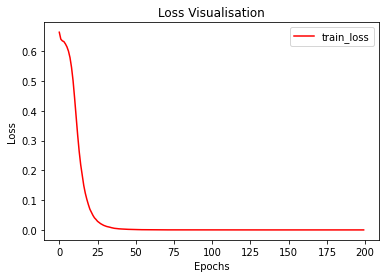

In [ ]:


from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN1_Train_GERMEVAL2018_Test_GERMEVAL2019_TASK_A_Ger_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN1_Train_GERMEVAL2018_Test_GERMEVAL2019_TASK_A_Ger_lossPlot.pdf') 



# Epoch v/s Accuracy Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

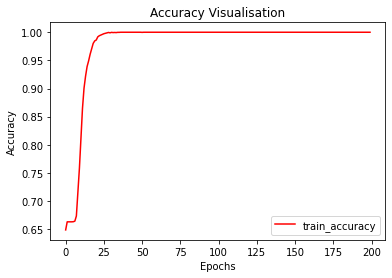

In [ ]:


plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN1_Train_GERMEVAL2018_Test_GERMEVAL2019_TASK_A_Ger_accuracyPlot.pdf',dpi=1000)
files.download('CNN1_Train_GERMEVAL2018_Test_GERMEVAL2019_TASK_A_Ger_accuracyPlot.pdf') 



# Area under Curve-ROC


In [ ]:


pred_train = CNN1_network.predict(padded_clean_text_stem)
pred_test = CNN1_network.predict(padded_clean_text_t_stem)



In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN1_Train_GERMEVAL2018_Test_GERMEVAL2019_TASK_A_Ger_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN1_Train_GERMEVAL2018_Test_GERMEVAL2019_TASK_A_Ger_Area_RocPlot.pdf')

  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

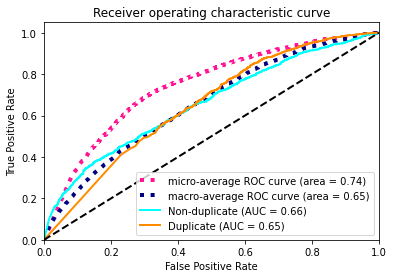

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)